### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
netflix = pd.read_csv('raw_titles.csv')

- title: The title of the movie or TV show. (String)

- type: The type of media, either movie or TV show. (String)

- release_year: The year the movie or TV show was released. (Integer)

- age_certification: The age certification of the movie or TV show. (String)

- runtime: The length of the movie or TV show in minutes. (Integer)

- genres: The genres of the movie or TV show. (String)

- production_countries: The countries or regions where the movie or TV show was produced. (String)

- seasons: The number of seasons for a TV show. (Integer)

- imdb_scor:e The IMDb score of the movie or TV show. (Float)

- imdb_votes: The number of IMDb votes for the movie or TV show. (Integer)

In [3]:
netflix.describe()

,index,release_year,runtime,seasons,imdb_score,imdb_votes
count,5806.000000,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03
mean,2902.500000,2016.013434,77.643989,2.165608,6.533447,2.340719e+04
std,1676.192163,7.324883,39.474160,2.636207,1.160932,8.713432e+04
min,0.000000,1945.000000,0.000000,1.000000,1.500000,5.000000e+00
25%,1451.250000,2015.000000,44.000000,1.000000,5.800000,5.210000e+02
50%,2902.500000,2018.000000,84.000000,1.000000,6.600000,2.279000e+03
75%,4353.750000,2020.000000,105.000000,2.000000,7.400000,1.014400e+04
max,5805.000000,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [4]:
netflix.isnull().sum()

index                      0
id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [5]:
netflix

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,5801,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0
5802,5802,tm1108171,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN
5803,5803,tm1045018,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0
5804,5804,tm1098060,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0


In [6]:
netflix.drop(['id', 'imdb_id', 'index'], axis=1, inplace=True)

In [7]:
display(netflix.drop_duplicates())

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"['action', 'thriller']",[],NaN,6.2,9.0


In [8]:
netflix['genres'].unique()

array(["['documentation']", "['crime', 'drama']", "['comedy', 'fantasy']",
       ..., "['crime', 'comedy', 'drama', 'thriller', 'action']",
       "['music', 'romance', 'comedy']",
       "['family', 'comedy', 'animation']"], dtype=object)

In [44]:
def clean_list(lst):
    
    lst = lst.replace("'", '')
    lst = lst.replace('[', '')
    lst = lst.replace(']', '')
    return lst
netflix['genres'] = netflix['genres'].apply(clean_list)
netflix['genres'].unique()

array(['documentation', 'crime, drama', 'comedy, fantasy', ...,
       'crime, comedy, drama, thriller, action', 'music, romance, comedy',
       'family, comedy, animation'], dtype=object)

In [43]:
def clean_list(lst):
    
    lst = lst.replace("'", '')
    lst = lst.replace('[', '')
    lst = lst.replace(']', '')
    return lst
netflix['production_countries'] = netflix['production_countries'].apply(clean_list)
netflix['genres'].unique()

array(['documentation', 'crime, drama', 'comedy, fantasy', ...,
       'crime, comedy, drama, thriller, action', 'music, romance, comedy',
       'family, comedy, animation'], dtype=object)

In [78]:
netflix['age_certification'].unique()

array(['TV-MA', 'R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

In [99]:
netflix

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1.0,NaN,NaN
1,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,NaN,8.3,795222.0
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,NaN,8.2,530877.0
3,Life of Brian,MOVIE,1979,R,94,comedy,GB,NaN,8.0,392419.0
4,The Exorcist,MOVIE,1973,R,133,horror,US,NaN,8.1,391942.0
...,...,...,...,...,...,...,...,...,...,...
5801,Fine Wine,MOVIE,2021,NaN,100,"romance, drama",NG,NaN,6.9,39.0
5802,Edis Starlight,MOVIE,2021,NaN,74,"music, documentation",,NaN,NaN,NaN
5803,Clash,MOVIE,2021,NaN,88,"family, drama","NG, CA",NaN,6.5,32.0
5804,Shadow Parties,MOVIE,2021,NaN,116,"action, thriller",,NaN,6.2,9.0


### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

<AxesSubplot:xlabel='Count', ylabel='age_certification'>

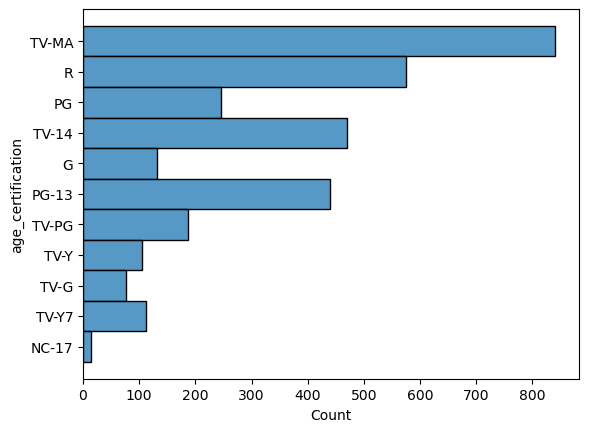

In [119]:
sns.histplot(netflix, y='age_certification')

- TV-MA: Mature Audiences

- R: Strong warning toward parents to investigate the content of a movie more thoroughly before they take their children to see them.

- PG: Suitable for general viewing, but some scenes may be unsuitable for younger children.

- TV-14: Unsuitable for Children Younger than 14

- G: General Audiences

- PG-13: Some Material May Be Inappropriate For Children Under 13

- TV-PG: The content should be fine for children around the age of 7 and older 

- TV-Y: Designed to be appropriate for all children

- TV-G: Are Generally suitable for all ages. 

- TV-Y7: Designed for children age 7 and above.

- NC-17: Not suitable for their children under 18

- Most of the content are not suitbale for childrens
- Ages between 13 and 17 have the less content that consider suitbale for them

<AxesSubplot:xlabel='type', ylabel='Count'>

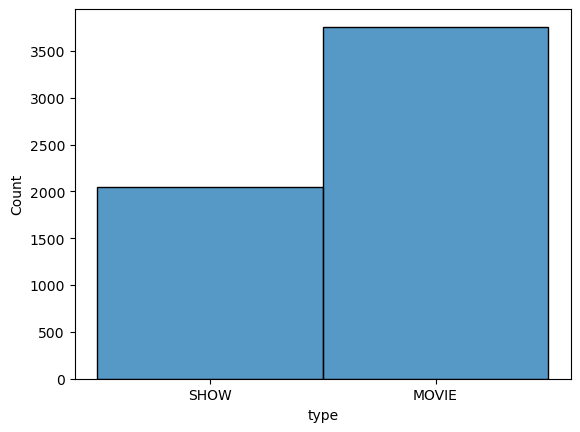

In [120]:
sns.histplot(netflix, x='type')

- More Movies than TV shows

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

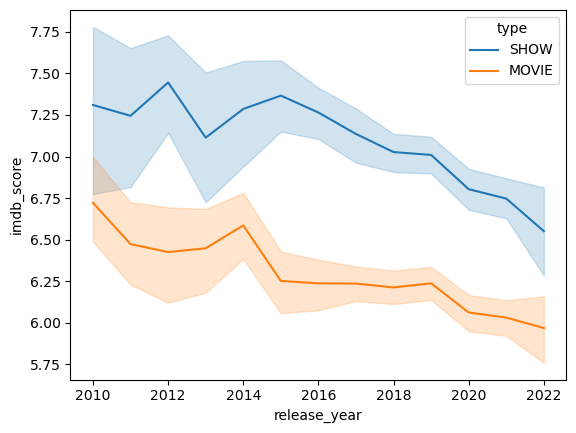

In [118]:
year = (netflix['release_year'] >= 2010)
year = netflix.loc[year]
sns.lineplot(data = year, x='release_year', y='imdb_score', hue='type')

- Inverse Relationship. Ratings are decreasing over the last 12 years
- TV Shows outperform Movies

<AxesSubplot:xlabel='release_year', ylabel='imdb_score'>

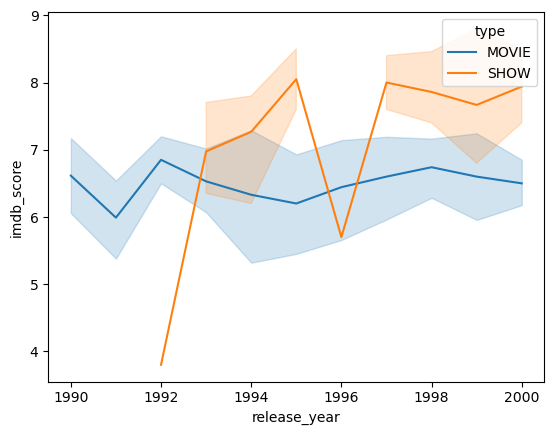

In [114]:
yearR = (netflix['release_year'] <= 2000) & (netflix['release_year'] >= 1990)
yearR = netflix.loc[yearR]
sns.lineplot(data = yearR, x='release_year', y='imdb_score', hue='type')

- There are alot of Missing Values
- Movies rating do not exceed 7

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

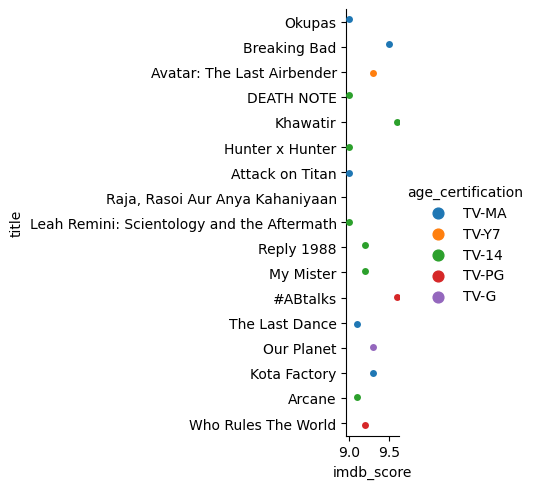

In [167]:
titles = (netflix['imdb_score'] >= 9) & (netflix['type'] == 'SHOW')
titles = netflix.loc[titles]
sns.catplot(data = titles, x='imdb_score', y='title', hue='age_certification')

- TV-MA: Mature Audiences
- TV-Y7: Designed for children age 7 and above.
- TV-14: Unsuitable for Children Younger than 14
- TV-PG: The content should be fine for children around the age of 7 and older
- TV-G: Are Generally suitable for all ages.

- No TV Show ever got a 10 rating
- We see content that suitable for Children got high ratings
- Animation and documentation are the most genres that got 9 rating